In [1]:
import cv2
import numpy as np
from datascience import *
from matplotlib import pyplot as plt
import sys
import os
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
images = []
image_names = []

235227Ventral-Flash-1.png
Initial Value used


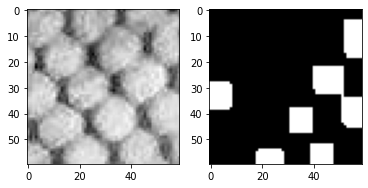

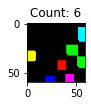

235227Ventral-NoFlash-1.png
Initial Value used


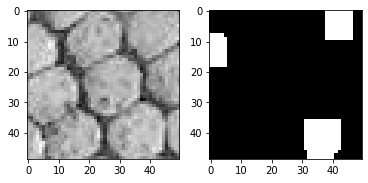

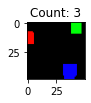

235227Ventral-Flash-2.png
Initial Value used


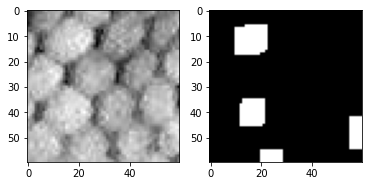

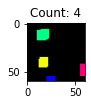

235227Ventral-NoFlash-2.png
Initial Value used


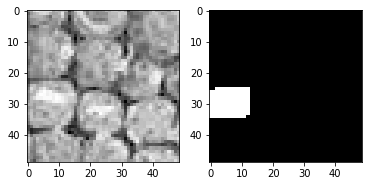

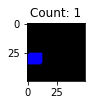

135164_V-3png.png
Initial Value used


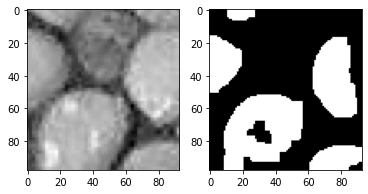

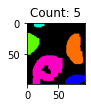

135164_V-1.png
Initial Value used


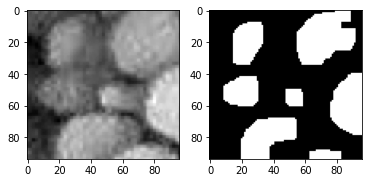

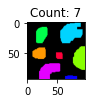

135164_V-2.png
Initial Value used


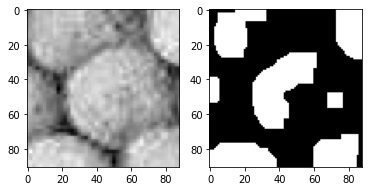

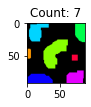

135164_D-3.png
Initial Value used


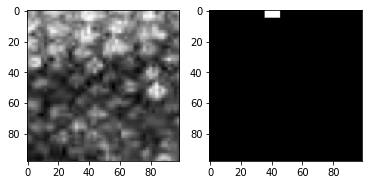

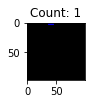

135164_D-2.png
Initial Value used


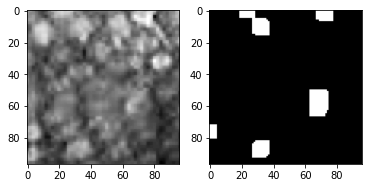

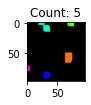

235237Dorsal-Flash-2.png
Initial Value used


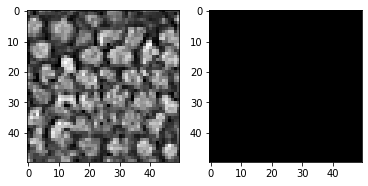

<ipython-input-3-7ac10ac119b1>:79: RuntimeWarning: invalid value encountered in true_divide
  label_hue = np.uint8(179 * labels / np.max(labels))


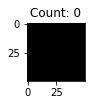

135164_D-1.png
Initial Value used


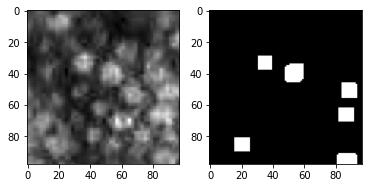

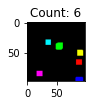

235237Dorsal-Flash-1.png
Initial Value used


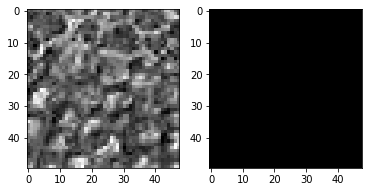

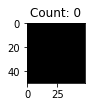

235233Dorsal-Flash-1.png
Initial Value used


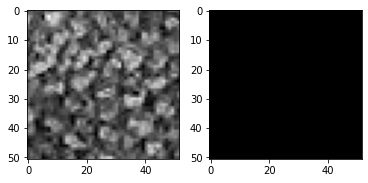

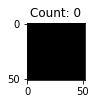

In [3]:
#trying otsu for initial binarization
#figure out exactly what block size measures: how does it depend on image size?
#can you use color spaces for reigions of the images?
#Think about how we would aproach cleaning up images: removing noise: would we do this by size remaining?
#why in one image do you get a very small scale
#Useful things to explore: more blurring? how to make a single color color a scale? is there a way to do this before thresholding


#access img directory
dirname = 'More_images/'

#create an iterator object for img directory
directory = os.scandir(dirname)

#print(os.listdir(directory))

def initial_binarization(initial_block_size, initial_iteration, customized):
    index = 0;
    images.clear
    for img in directory:
        img_name = img.name
        if (img_name != '.ipynb_checkpoints'):
            print(img.name)
            image_names.append(img.name)

            #read the image, convert to grayscale, make histogram
            img = cv2.imread(dirname + "" + img_name)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            
            title = img_name
            blur = cv2.GaussianBlur(gray,(5,5),0)
            
            
            #if the customized block size has not yet been determined this if statement will run
            if(len(customized)==0):
                print("Initial Value used")
                thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, initial_block_size, -2)
           
            #if customized block size has been determined
            else:
                print("Customized Values used")
                print(block_size[index][0], block_size[index][1])
                thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size[index][0], -2)
                
            kernel = np.ones((3,3),np.uint8)
            
            #if the customized iteration has not yet been determined this if statement will run
            if(len(customized)==0):
                opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 5)
            
            #if customized iteration has been determined
            else:
                opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations=block_size[index][1])

            
            # sure background area
            sure_bg = cv2.dilate(opening,kernel,iterations=1)

            # Finding sure foreground area: What does cv2.DIST do?
            dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
            ret, sure_fg = cv2.threshold(dist_transform, 1.5, 255, 0) 

            # Finding unknown region
            sure_fg = np.uint8(sure_fg)
            unknown = cv2.subtract(sure_bg,sure_fg)
            
            #adding sure_fg binarization to list of images
            images.append(sure_fg)


            plt.subplot(1,2,1), plt.imshow(gray, 'gray')
            plt.subplot(1,2,2), plt.imshow(sure_fg, 'gray')
            plt.show()
            
            # Label and count (taken from maggie's code)
            # source: https://medium.com/analytics-vidhya/images-processing-segmentation-and-objects-counting-in-an-image-with-python-and-opencv-216cd38aca8e
            count, labels = cv2.connectedComponents(sure_fg)
            count = count - 1 # background doesn't count as a scale
            label_hue = np.uint8(179 * labels / np.max(labels))
            blank_ch = 255 * np.ones_like(label_hue)
            labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
            labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
            labeled_img[label_hue == 0] = 0

            plt.subplot(1, 5, 5), plt.imshow(labeled_img, 'gray')
            plt.title('Count: ' + str(count))
            plt.show()
            index += 1
            
initial_binarization(41, 4, [])
    

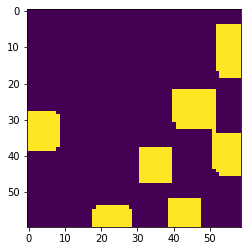

[103 224  97  90  72  64]
Number of scales detected 6
Average size of scales:  108.33333333333333
[[7, 108.33333333333333]]


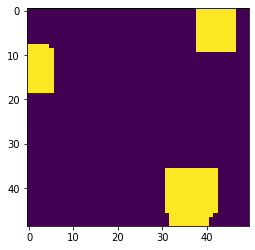

[ 90  65 148]
Number of scales detected 3
Average size of scales:  101.0
[[7, 108.33333333333333], [4, 101.0]]


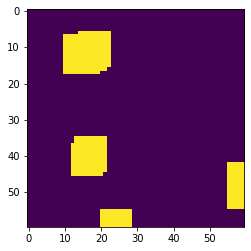

[148 107  65  45]
Number of scales detected 4
Average size of scales:  91.25
[[7, 108.33333333333333], [4, 101.0], [5, 91.25]]


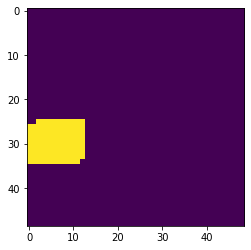

[127]
Number of scales detected 1
Average size of scales:  127.0
[[7, 108.33333333333333], [4, 101.0], [5, 91.25], [2, 127.0]]


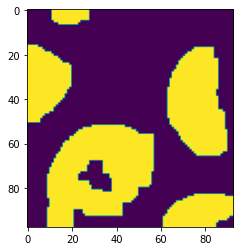

[ 106  515  995 1543  391]
Number of scales detected 5
Average size of scales:  710.0
[[7, 108.33333333333333], [4, 101.0], [5, 91.25], [2, 127.0], [6, 710.0]]


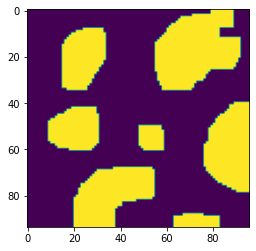

[932 424 617 359 116 645 109]
Number of scales detected 7
Average size of scales:  457.42857142857144
[[7, 108.33333333333333], [4, 101.0], [5, 91.25], [2, 127.0], [6, 710.0], [8, 457.42857142857144]]


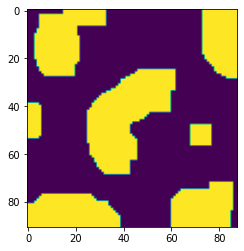

[542 390 964  88  81 429 475]
Number of scales detected 7
Average size of scales:  424.14285714285717
[[7, 108.33333333333333], [4, 101.0], [5, 91.25], [2, 127.0], [6, 710.0], [8, 457.42857142857144], [8, 424.14285714285717]]


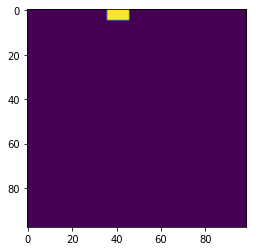

[50]
Number of scales detected 1
Average size of scales:  50.0
[[7, 108.33333333333333], [4, 101.0], [5, 91.25], [2, 127.0], [6, 710.0], [8, 457.42857142857144], [8, 424.14285714285717], [2, 50.0]]


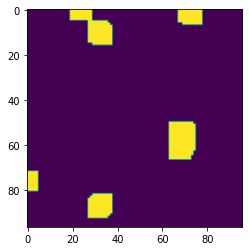

[166  75 197  45 115]
Number of scales detected 5
Average size of scales:  119.6
[[7, 108.33333333333333], [4, 101.0], [5, 91.25], [2, 127.0], [6, 710.0], [8, 457.42857142857144], [8, 424.14285714285717], [2, 50.0], [6, 119.6]]


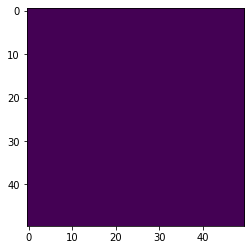

[]
Number of scales detected 0
Average size of scales:  nan
[[7, 108.33333333333333], [4, 101.0], [5, 91.25], [2, 127.0], [6, 710.0], [8, 457.42857142857144], [8, 424.14285714285717], [2, 50.0], [6, 119.6], [1, nan]]


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


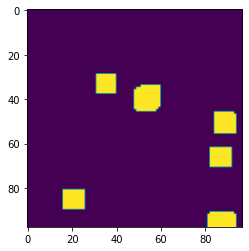

[ 81 136  99  90  90  89]
Number of scales detected 6
Average size of scales:  97.5
[[7, 108.33333333333333], [4, 101.0], [5, 91.25], [2, 127.0], [6, 710.0], [8, 457.42857142857144], [8, 424.14285714285717], [2, 50.0], [6, 119.6], [1, nan], [7, 97.5]]


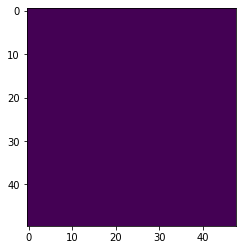

[]
Number of scales detected 0
Average size of scales:  nan
[[7, 108.33333333333333], [4, 101.0], [5, 91.25], [2, 127.0], [6, 710.0], [8, 457.42857142857144], [8, 424.14285714285717], [2, 50.0], [6, 119.6], [1, nan], [7, 97.5], [1, nan]]


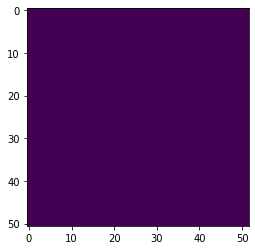

[]
Number of scales detected 0
Average size of scales:  nan
[[7, 108.33333333333333], [4, 101.0], [5, 91.25], [2, 127.0], [6, 710.0], [8, 457.42857142857144], [8, 424.14285714285717], [2, 50.0], [6, 119.6], [1, nan], [7, 97.5], [1, nan], [1, nan]]


In [4]:
#how to get the area of the spots in the image?
#Factors that go into seeing if a scale is correct: size of the scale: distance of the scale to other scales
#Maybe look also at the distance of the scale from the


#arrays that keep track of important measurements
average_size = []
scale_num_per_img = []
sizes_of_scales = []


#iterates through images to determine average size and count of scales in initial binarization

for img in images:
    plt.imshow(img)
    plt.show()

    binary_map = (img > 0).astype(np.uint8)
    connectivity = 4 # or whatever you prefer
    output = cv2.connectedComponentsWithStats(binary_map, connectivity, cv2.CV_32S)

    num_labels = output[0]
    # The second cell is the label matrix
    labels = output[1]
    # The third cell is the stat matrix
    stats = output[2]
    # The fourth cell is the centroid matrix
    centroids = output[3]
    
    #prints stats
    print(stats[1:,-1])
    print("Number of scales detected", num_labels - 1)
    print("Average size of scales: ", np.average(stats[1:,-1]))
    
    

    average_size.append(([num_labels, np.average(stats[1:,-1])]))
    print(average_size)

    

In [5]:
for i in average_size:
    print(i)

[7, 108.33333333333333]
[4, 101.0]
[5, 91.25]
[2, 127.0]
[6, 710.0]
[8, 457.42857142857144]
[8, 424.14285714285717]
[2, 50.0]
[6, 119.6]
[1, nan]
[7, 97.5]
[1, nan]
[1, nan]


In [6]:
#a better way to do this? Run more significant tests to determine the best relationship you can


#array that stores final block size and iteration statistics
block_size = []

#tentative if statements
for stat in average_size:
    if stat[0] <= 1:
        block_size.append([15,1])
        
    elif stat[1] < 400:
        block_size.append([25, 2])
        
    else:
        block_size.append([65, 2])

print(block_size)
print(len(image_names), len(block_size))
print(image_names)

size_and_it = Table().with_columns("img_name", image_names, "block_size", [i[0] for i in block_size], "iterations" ,[i[1] for i in block_size])
size_and_it.show()

[[25, 2], [25, 2], [25, 2], [25, 2], [65, 2], [65, 2], [65, 2], [25, 2], [25, 2], [15, 1], [25, 2], [15, 1], [15, 1]]
13 13
['235227Ventral-Flash-1.png', '235227Ventral-NoFlash-1.png', '235227Ventral-Flash-2.png', '235227Ventral-NoFlash-2.png', '135164_V-3png.png', '135164_V-1.png', '135164_V-2.png', '135164_D-3.png', '135164_D-2.png', '235237Dorsal-Flash-2.png', '135164_D-1.png', '235237Dorsal-Flash-1.png', '235233Dorsal-Flash-1.png']


img_name,block_size,iterations
235227Ventral-Flash-1.png,25,2
235227Ventral-NoFlash-1.png,25,2
235227Ventral-Flash-2.png,25,2
235227Ventral-NoFlash-2.png,25,2
135164_V-3png.png,65,2
135164_V-1.png,65,2
135164_V-2.png,65,2
135164_D-3.png,25,2
135164_D-2.png,25,2
235237Dorsal-Flash-2.png,15,1


google_image2.png
Customized Values used
25 2


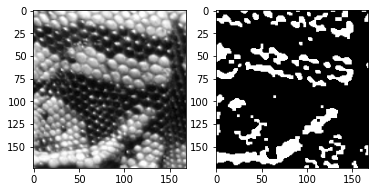

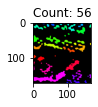

google_ig3.png
Customized Values used
25 2


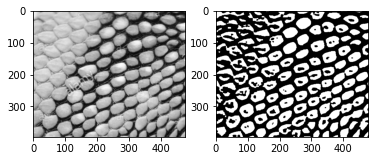

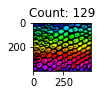

google_img3.png
Customized Values used
25 2


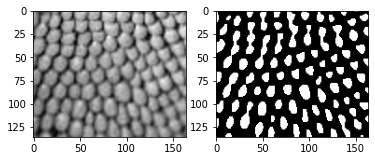

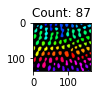

google_img1.20.45 AM.png
Customized Values used
25 2


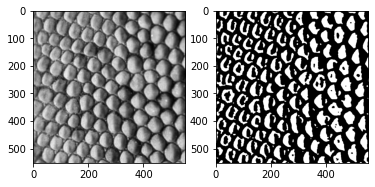

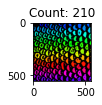

google_img5.png
Customized Values used
65 2


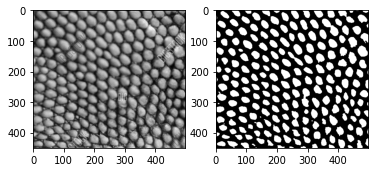

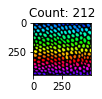

google_img4.png
Customized Values used
65 2


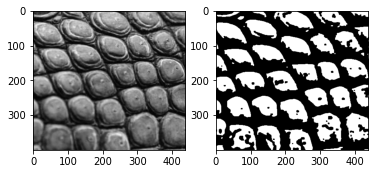

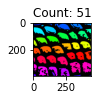

In [7]:
dirname = 'google_images/'

#create an iterator object for img directory
directory = os.scandir(dirname)

images = []
initial_binarization(0, 0, block_size)



In [8]:
initial_binarization(41, 4,[])

Number of scales detected 0
Average size of scales:  105.76785714285714



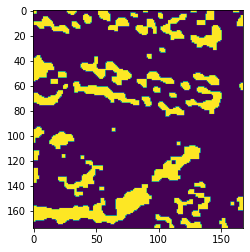

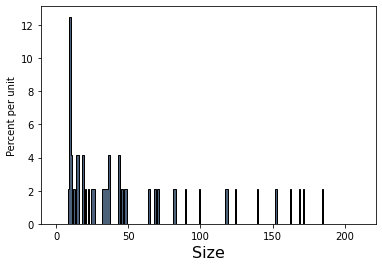

Number of scales detected 0
Average size of scales:  659.3100775193799



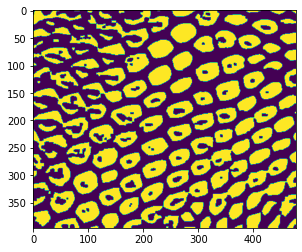

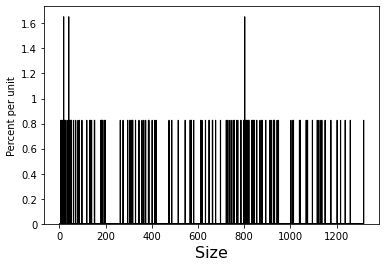

Number of scales detected 0
Average size of scales:  76.72413793103448



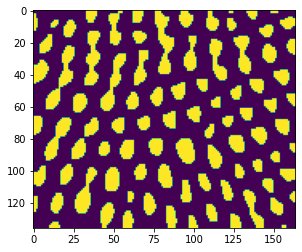

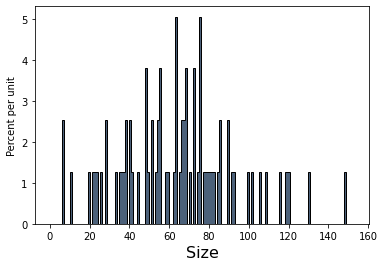

Number of scales detected 0
Average size of scales:  527.7



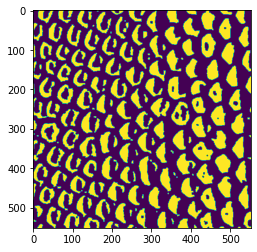

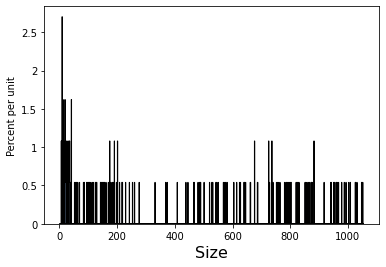

Number of scales detected 0
Average size of scales:  404.5141509433962



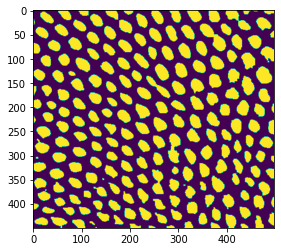

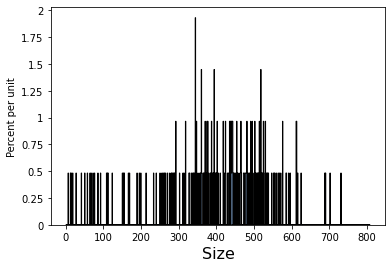

Number of scales detected 0
Average size of scales:  1468.6470588235295



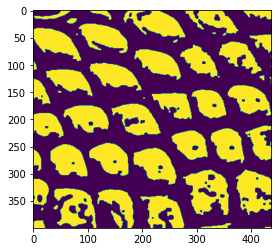

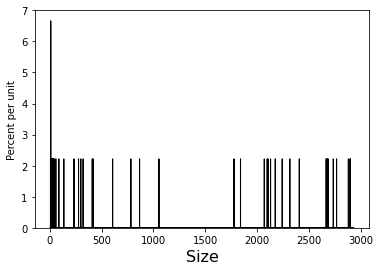

In [9]:

for img in images:
    plt.imshow(img)
    binary_map = (img > 0).astype(np.uint8)
    connectivity = 4 # or whatever you prefer
    output = cv2.connectedComponentsWithStats(binary_map, connectivity, cv2.CV_32S)
    stats = output[2]

    print("Number of scales detected", num_labels - 1)
    print("Average size of scales: ", np.average(stats[1:,-1]))
    print()
    size_table = Table().with_column("Size", stats[1:,-1])
    size_table.hist(bins= np.arange(0, np.average(stats[1:,-1]) * 2))

    plt.show()
    